Author: Andrew Scott

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Accessing datasets
import statsmodels.api as sm

# For dataframes
import pandas as pd

# Generating plots
import matplotlib.pyplot as plt

# Generating plots 
import seaborn as sns

# For accessing dates and times
import datetime as dt

# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

The plan is to use a real-world dataset to serve as a model for the simulated dataset. I have decided to simulate the following dataset that was originally published by Ronald Fisher that consists of cats and their gender, weight, and heart weight[x]. The dataset is part of the MASS package for the programming language R. However, these datasets can be accessed in python using the statsmodel package. https://kolesnikov.ga/Datasets_in_Python/

In [2]:
# Load the cats dataset 
cats = sm.datasets.get_rdataset(dataname='cats', package='MASS')

In [3]:
# Prnt some information about the dataset 
print(cats.__doc__)

.. container::

   ==== ===============
   cats R Documentation
   ==== ===============

   .. rubric:: Anatomical Data from Domestic Cats
      :name: anatomical-data-from-domestic-cats

   .. rubric:: Description
      :name: description

   The heart and body weights of samples of male and female cats used
   for *digitalis* experiments. The cats were all adult, over 2 kg body
   weight.

   .. rubric:: Usage
      :name: usage

   ::

      cats

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   ``Sex``
      sex: Factor with levels ``"F"`` and ``"M"``.

   ``Bwt``
      body weight in kg.

   ``Hwt``
      heart weight in g.

   .. rubric:: Source
      :name: source

   R. A. Fisher (1947) The analysis of covariance method for the
   relation between a part and the whole, *Biometrics* **3**, 65–68.

   .. rubric:: References
      :name: references

   Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics
   with S.* F

In [4]:
# Load the cats dataset to a pandas dataframe
df_cats = cats.data

In [5]:
# View the first few rows of the dataframe
df_cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
# View the shape of the dataframe
df_cats.shape

(144, 3)

In [7]:
# View summary statistics of dataframe
df_cats.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.723611,10.630556
std,0.485307,2.434636
min,2.000000,6.300000
25%,2.300000,8.950000
50%,2.700000,10.100000
75%,3.025000,12.125000
max,3.900000,20.500000


In [8]:
# Show the amount of male and female cats in the dataset
df_cats['Sex'].value_counts()

M    97
F    47
Name: Sex, dtype: int64

In [9]:
# Save the original dataset
# Access the current date and time.
now = dt.datetime.now()

# Formatting the current date and time as a string and saving to a variable.
current_time = now.strftime('%Y%m%d_%H%M%S')

# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats_original_'  + current_time + '.csv'

# Save pandas data frame to disk.
df_cats.to_csv(path)

As the sex of the cat may impact the other variables, it would be a good idea to also look at the summary statistics for each sex. The idea to use both groupby and describe in the same line of code came from https://stackoverflow.com/questions/42579148/get-columns-describe-from-group-by.

In [26]:
# View summary statistics for each sex
df_cats.groupby(['Sex']).describe()

Bwt                                                 Hwt             \
    count      mean       std  min   25%  50%  75%  max count       mean   
Sex                                                                        
F    47.0  2.359574  0.273988  2.0  2.15  2.3  2.5  3.0  47.0   9.202128   
M    97.0  2.900000  0.467484  2.0  2.50  2.9  3.2  3.9  97.0  11.322680   

                                            
          std  min   25%   50%   75%   max  
Sex                                         
F    1.357666  6.3  8.35   9.1  10.1  13.0  
M    2.542288  6.5  9.40  11.4  12.8  20.5

The standard deviations of the male values for body weight and heart weight are much higher than for females, suggesting there is typically a greater variation in male sizes, whereas females tend to be more similar in body and heart weights to one another. 

The above summaries gives an overview as to the dimensions and datatypes involved. There are three variable types - a binary male/female column, and two numerical columns containing body weights and heart weights. We will have to invent a fourth column when simulating this dataset to meet the criteria of simulated dataset having at least four variables. First it will be helpful to plot the dataset to visualise the distributions of each variable. 

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

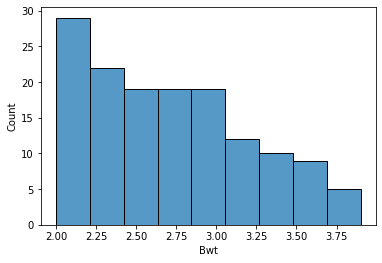

In [11]:
# Plotting the body weight
sns.histplot(data = df_cats, x = 'Bwt')

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

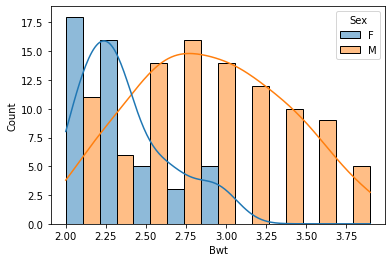

In [12]:
# Plotting the bodyweight by sex
sns.histplot(data = df_cats, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

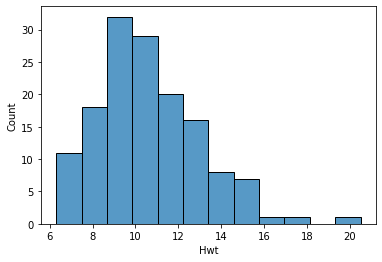

In [13]:
# Plotting the heart weight
sns.histplot(data = df_cats, x = 'Hwt')

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

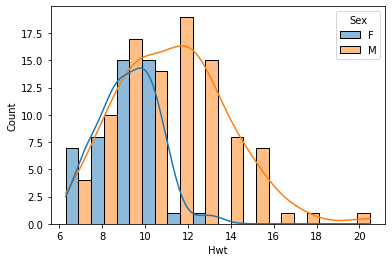

In [14]:
# Plotting the heart weight by sex
sns.histplot(data = df_cats, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)

Both the summary statistics and the plots suggest that sex has an influence over the distribution of the variables. Therefore, it might be a good idea to create two new dataframes containing the data for each sex. These can then be tested to see which distribution best fits the weights for each sex. 

In [15]:
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
# New df for each sex
df_cats_female = df_cats.loc[df_cats['Sex'] == 'F']
df_cats_male = df_cats.loc[df_cats['Sex'] == 'M']